# Wildflower Project - Evaluation - season2

Test and evaluation with the refined dataset.

I will test: 
 - **Model A:** season 2 classifier (transfer learning with fine tune of all layers in Inception V3)
 - **Model B:** season 2 classifier3 5 blocks (fine tune with the last 5 Inception modules in Inception V3)
 - **Model C:** season 2 classifier3 3 blocks (fine tune with the last 3 Inception modules in Inception V3)
 - **Model D:** season 2 classifier3 2 blocks (fine tune with the last 2 Inception modules in Inception V3)

In [1]:
%matplotlib notebook

import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

import matplotlib.pyplot as plt
import numpy as np
import random
from numpy.random import default_rng
import seaborn as sns

np.set_printoptions(suppress=True) # Avoid scientific notation (1.500e-4)

print('TensorFlow version:', tf.__version__)

TensorFlow version: 2.2.0


In [2]:
tf.config.list_physical_devices('GPU')

[]

In [3]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

## Check the number of Test Data

In [4]:
image_dir = "wf_data2"
test_dir = os.path.join(image_dir, "test")
print(test_dir)

test_classnum = len(os.listdir(test_dir))
print("Number of classes = {}".format(len(os.listdir(test_dir))))

test_samples = 0
for c in os.listdir(test_dir):
    test_samples += len(os.listdir(os.path.join(test_dir, c)))

print("Number of test samples = {}".format(test_samples))

wf_data2/test
Number of classes = 108
Number of test samples = 561


## Model A ( Fine tuning for all layers)

In [5]:
model_a_file = "wfmodel_s2_ft.h5"
model_a = load_model(model_a_file)

model_a.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
inception_v3 (Model)         (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328

In [6]:
_BATCH_SIZE = 32

In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=_BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 561 images belonging to 108 classes.


In [8]:
class_names = np.array(list(test_generator.class_indices.keys()))
#print(class_names)

In [9]:
y_pred_a = model_a.predict(x=test_generator, steps=(test_samples // _BATCH_SIZE) + 1)
y_true = test_generator.classes

In [10]:
y_pred_a_idx = np.argmax(y_pred_a, axis=1)

In [11]:
test_acc_a = np.sum(y_pred_a_idx == y_true) / test_samples * 100
print("Test Accuracy = {:.2f}%".format(test_acc_a))

Test Accuracy = 75.40%


## Model B ( Fine tuning for 5 inception blocks )

In [12]:
model_b_file = "wfmodel3_s2_5b_ft.h5"
model_b = load_model(model_b_file)

model_b.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
inception_v3 (Model)         (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328

In [13]:
test_generator.reset()

In [14]:
y_pred_b = model_b.predict(x=test_generator, steps=(test_samples // _BATCH_SIZE) + 1)

In [15]:
y_pred_b_idx = np.argmax(y_pred_b, axis=1)

In [16]:
test_acc_b = np.sum(y_pred_b_idx == y_true) / test_samples * 100
print("Test Accuracy = {:.2f}%".format(test_acc_b))

Test Accuracy = 76.65%


## Model C ( Fine tuning for 3 inception blocks )

In [17]:
model_c_file = "wfmodel3_s2_3b_ft.h5"
model_c = load_model(model_c_file)

model_c.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
inception_v3 (Model)         (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328

In [18]:
test_generator.reset()
y_pred_c = model_c.predict(x=test_generator, steps=(test_samples // _BATCH_SIZE) + 1)
y_pred_c_idx = np.argmax(y_pred_c, axis=1)

test_acc_c = np.sum(y_pred_c_idx == y_true) / test_samples * 100
print("Test Accuracy = {:.2f}%".format(test_acc_c))

Test Accuracy = 72.19%


## Model D ( Fine tuning for 2 inception blocks )

In [19]:
model_d_file = "wfmodel3_s2_ft.h5"
model_d = load_model(model_d_file)

model_d.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
inception_v3 (Model)         (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0     

In [20]:
test_generator.reset()
y_pred_d = model_d.predict(x=test_generator, steps=(test_samples // _BATCH_SIZE) + 1)
y_pred_d_idx = np.argmax(y_pred_d, axis=1)

test_acc_d = np.sum(y_pred_d_idx == y_true) / test_samples * 100
print("Test Accuracy = {:.2f}%".format(test_acc_d))

Test Accuracy = 66.84%


## Baseline (Feature extraction)

In [21]:
basemodel_a_file = "wfmodel_s2_noft.h5"
basemodel_b_file = "wfmodel3_s2_5b_noft.h5"
basemodel_c_file = "wfmodel3_s2_3b_noft.h5"
basemodel_d_file = "wfmodel3_s2_noft.h5"

# Basemodel A
bmodel_a =load_model(basemodel_a_file)
test_generator.reset()
y_pred_ba = bmodel_a.predict(x=test_generator, steps=(test_samples // _BATCH_SIZE) + 1)
y_pred_ba_idx = np.argmax(y_pred_ba, axis=1)

test_acc_ba = np.sum(y_pred_ba_idx == y_true) / test_samples * 100
print("Test Accuracy (Model A) = {:.2f}%".format(test_acc_ba))

# Basemodel B
bmodel_b =load_model(basemodel_b_file)
test_generator.reset()
y_pred_bb = bmodel_b.predict(x=test_generator, steps=(test_samples // _BATCH_SIZE) + 1)
y_pred_bb_idx = np.argmax(y_pred_bb, axis=1)

test_acc_bb = np.sum(y_pred_bb_idx == y_true) / test_samples * 100
print("Test Accuracy (Model B) = {:.2f}%".format(test_acc_bb))

# Basemodel C
bmodel_c =load_model(basemodel_c_file)
test_generator.reset()
y_pred_bc = bmodel_c.predict(x=test_generator, steps=(test_samples // _BATCH_SIZE) + 1)
y_pred_bc_idx = np.argmax(y_pred_bc, axis=1)

test_acc_bc = np.sum(y_pred_bc_idx == y_true) / test_samples * 100
print("Test Accuracy (Model C) = {:.2f}%".format(test_acc_bc))

# Basemodel D
bmodel_d =load_model(basemodel_d_file)
test_generator.reset()
y_pred_bd = bmodel_d.predict(x=test_generator, steps=(test_samples // _BATCH_SIZE) + 1)
y_pred_bd_idx = np.argmax(y_pred_bd, axis=1)

test_acc_bd = np.sum(y_pred_bd_idx == y_true) / test_samples * 100
print("Test Accuracy (Model D) = {:.2f}%".format(test_acc_bd))

Test Accuracy (Model A) = 55.08%
Test Accuracy (Model B) = 55.97%
Test Accuracy (Model C) = 56.51%
Test Accuracy (Model D) = 52.94%


In [22]:
fig, ax = plt.subplots()
fig.set_figwidth(7)

cmap = plt.get_cmap("tab10")
colors = cmap([0, 1, 2, 3, 4])
labels = ['Full layers', 'Last 5 modules', 'Last 3 modules', 'Last 2 modules', 'Before Fine-tuned']
acc_list = [test_acc_a, test_acc_b, test_acc_c, test_acc_d, test_acc_bc]
acc_label = ["{:.2f}".format(acc) for acc in acc_list]
rects = ax.bar(labels, acc_list, width=0.6, color=colors)

for idx, rect in enumerate(rects):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.05*height, acc_label[idx], ha='center', va='bottom')
ax.set_ylim(0, 100)
ax.set_xlabel('Level of fine-tuning')
ax.set_ylabel('Accuracy (%)')
#ax.bar_label(rects, padding=3)

fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

In [23]:
plt.savefig('test_accuracies_season2.jpg')

**Result:** **Model B** (Fine tune with the last 5 inception modules) scored the best test accuracy.

In [24]:
y_pred_idx = y_pred_b_idx
y_pred = y_pred_b

### Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
conf_mat = confusion_matrix(y_true, y_pred_idx)

In [27]:
conf_mat

array([[4, 0, 0, ..., 0, 0, 0],
       [0, 5, 0, ..., 0, 0, 0],
       [0, 0, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 3, 0, 1],
       [0, 0, 0, ..., 0, 5, 0],
       [0, 0, 0, ..., 0, 0, 5]])

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(conf_mat, cmap='BuPu', ax=ax)
ax.set_xlabel('Predicted class')
ax.set_ylabel('True class')
plt.title('Confusion Matrix for the number of samples')
plt.show()

<IPython.core.display.Javascript object>

In [29]:
num_per_class = np.sum(conf_mat, axis=1)
#print(num_per_class)

norm_conf_mat = (conf_mat / num_per_class)

In [30]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(norm_conf_mat, cmap='BuPu', ax=ax)
ax.set_xlabel('Predicted class')
ax.set_ylabel('True class')
plt.title('Normarized Confusion Matrix for the number of samples')
plt.show()

<IPython.core.display.Javascript object>

## See which flowers are detected better or worse

In [31]:
masked_conf_mat = norm_conf_mat * np.eye(norm_conf_mat.shape[0])
recall_per_class = np.sum(masked_conf_mat, axis=1)
print(recall_per_class)

[0.8        0.83333333 0.6        1.         0.66666667 0.6
 1.         0.5        0.57142857 0.2        1.         0.8
 1.         0.8        0.8        0.8        0.8        0.6
 0.85714286 0.6        0.6        0.5        0.8        0.4
 1.         0.8        0.8        0.6        0.75       0.8
 0.5        1.         1.         0.66666667 1.         0.8
 0.75       0.8        1.         0.75       0.8        0.6
 0.4        0.6        0.8        0.6        0.8        0.4
 0.83333333 0.8        0.8        0.6        0.8        0.8
 0.66666667 0.83333333 0.6        0.6        1.         0.8
 0.6        1.         0.85714286 0.8        0.6        0.8
 0.8        1.         1.         0.66666667 0.83333333 0.8
 0.8        0.8        1.         0.66666667 0.66666667 0.85714286
 0.2        0.85714286 1.         0.875      0.8        0.6
 0.8        0.8        0.8        1.         0.66666667 0.33333333
 0.5        0.66666667 1.         0.66666667 1.         0.83333333
 0.66666667 0.83333

In [32]:
import matplotlib.gridspec as gridspec
%matplotlib inline

def plot_flowers(idx_array):

    _row = idx_array.shape[0]
    _col = 4

    #fig, ax = plt.subplots(_row, _col, figsize=(9, 20), constrained_layout=True)
    dpi = 80.
    height = (150 / dpi) * _row
    fig = plt.figure(figsize=(15, height))
    

    for i in range(_row):
        #ax[i, 0].text(0, 0.5, class_names[idx_array[i]])
        #ax[i, 0].set_xticks([])
        #ax[i, 0].set_yticks([])
        
        ax = fig.add_subplot(_row, _col, (i*4)+1)
        ax.axis('off')
        image_label = "{}: {}".format(idx_array[i], class_names[idx_array[i]])
        plt.text(0.5, 0.5, image_label, fontsize=12)
        
        class_path = os.path.join(test_dir, class_names[idx_array[i]])
        image_list = os.listdir(class_path)
        for j, image_file in enumerate(image_list[:3]):
            img = load_img(os.path.join(class_path, image_file))
            img = img.resize((150,150))
            img = img_to_array(img)
            img /= 255.
            #ax[i, 1+j].imshow(img)
            #ax[i, 1+j].set_xticks([])
            #ax[i, 1+j].set_yticks([])
            ax = fig.add_subplot(_row, _col, (i*4)+j+2)
            ax.axis('off')
            plt.imshow(img)
    
    plt.xticks([])
    plt.yticks([])
    plt.show()

### Flowers more than 80% of which were detected correctly in test data 

Recall = (true positives / relevant images)

In [33]:
acc08 = np.squeeze(np.argwhere(recall_per_class >= 0.8))
print("Total {} flowers are detected correctly. (recall >= 0.8), {:.2f}% of the {} categories".format(acc08.shape[0], acc08.shape[0]/class_names.shape[0]*100, class_names.shape[0]))


Total 67 flowers are detected correctly. (recall >= 0.8), 62.04% of the 108 categories


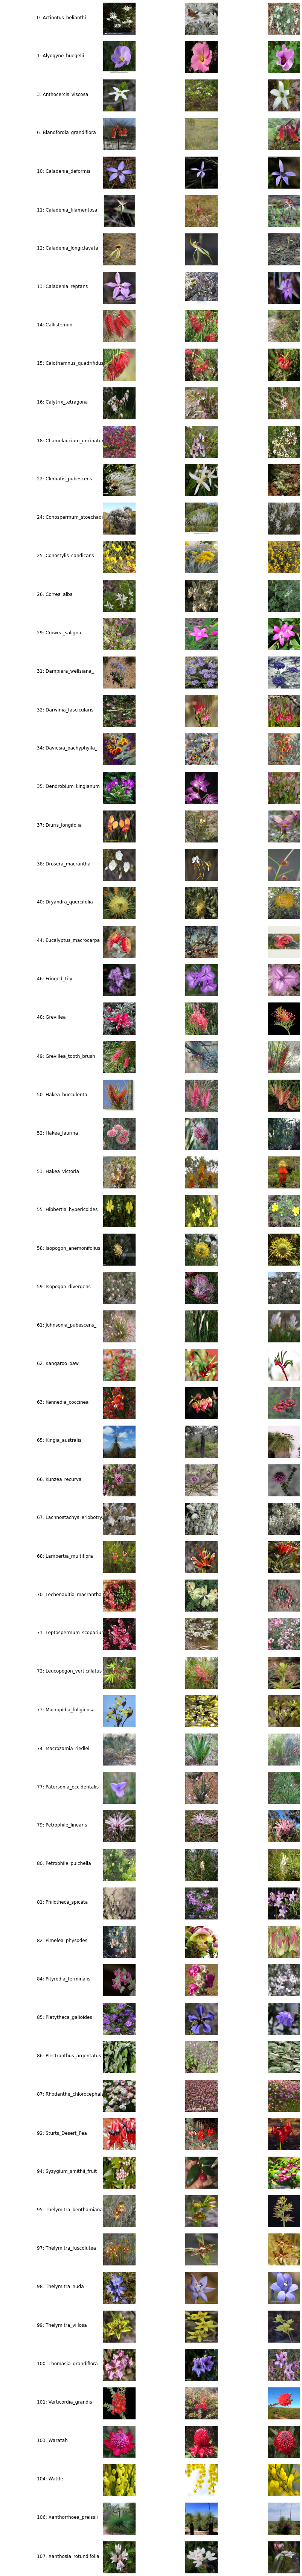

In [34]:
plot_flowers(acc08)

### Flowers less than 30% of which detected correctly in test data 

In [35]:
acc_less03 = np.squeeze(np.argwhere(np.sum(masked_conf_mat, axis=1) < 0.3))

In [36]:
#len(acc_less03)
print("Total {} flowers are detected correctly. (recall < 0.3), {:.2f}% of the {} categories".format(acc_less03.shape[0], acc_less03.shape[0]/class_names.shape[0]*100, class_names.shape[0]))

Total 2 flowers are detected correctly. (recall < 0.3), 1.85% of the 108 categories


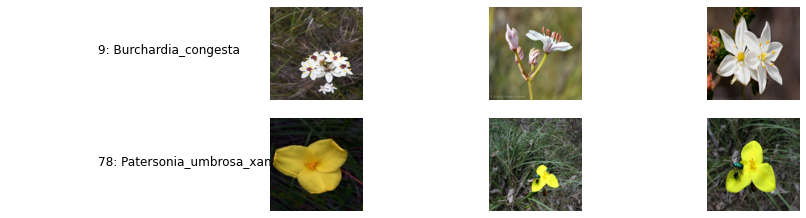

In [37]:
plot_flowers(acc_less03)

## Distribution of probability for classes (how much confidently the model detected the right class)

In [38]:
y_pred_correct = y_pred[np.arange(y_pred.shape[0]), y_true]
y_pred_correct /= np.sum(y_pred, axis=1) # probability

In [39]:
pred_prob_2D = [y_pred_correct[np.argwhere(y_true==i)] for i in np.arange(test_classnum)]

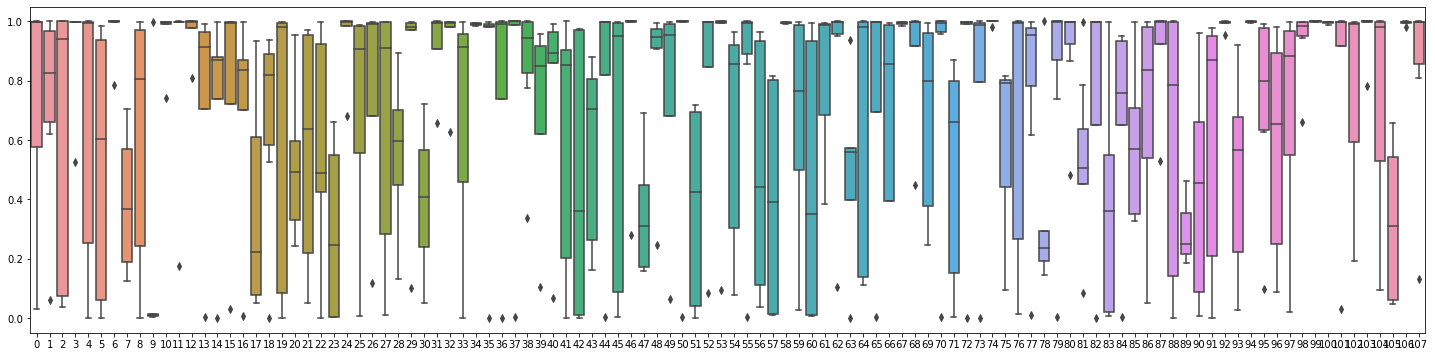

In [40]:
fig, ax = plt.subplots(figsize=(25, 6))

ax = sns.boxplot(data=pred_prob_2D, ax=ax)
plt.show()

In [41]:
pred_prob_2D_08 = []
for i in np.arange(test_classnum):
    if i in acc08:
        pred_prob_2D_08.append(pred_prob_2D[i])
        #print('{}: {} = {}'.format(i, class_names[i], pred_prob_2D[i]))

#print(pred_prob_2D_08)

### Distribution for classes with more than 80% of recall

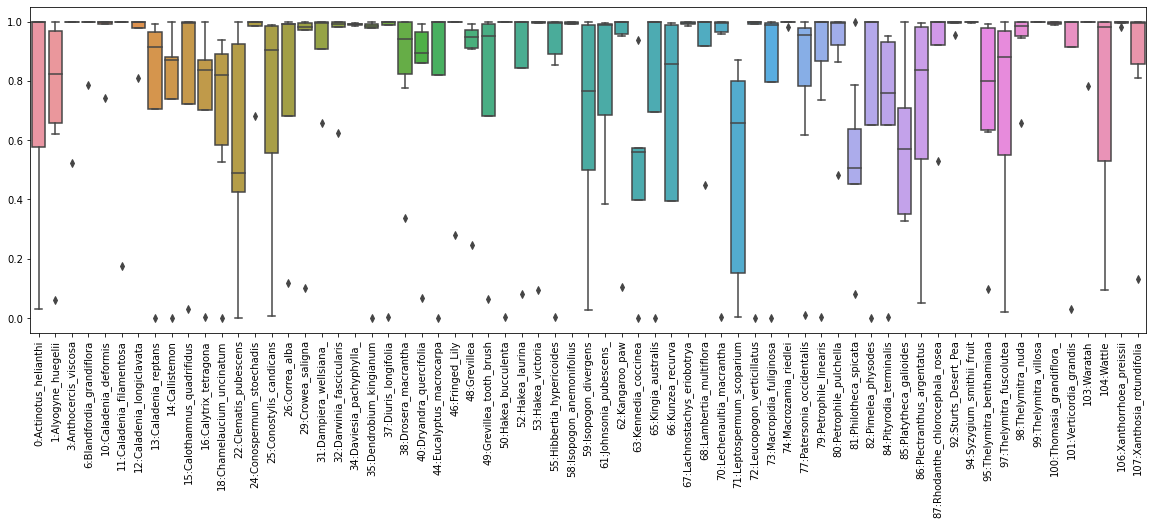

In [42]:
fig, ax = plt.subplots(figsize=(20, 6))

labels = ["{}:{}".format(i, class_names[i]) for i in acc08]
#print(labels)
#print(len(pred_prob_2D_08))
ax = sns.boxplot(data=pred_prob_2D_08, ax=ax)
ax.set_xticklabels(labels, rotation=90)
plt.show()

### How the model mistakes? Confusion matrix about classes with bad identification

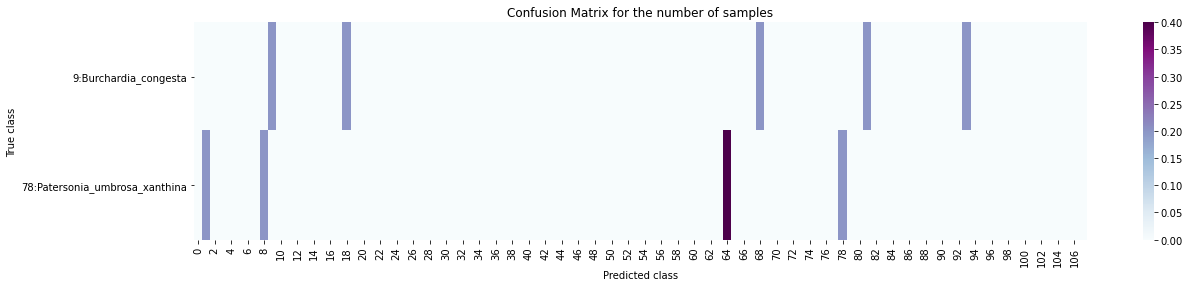

In [43]:
conf_mat_less = conf_mat[acc_less03]
conf_mat_less_norm = conf_mat_less / np.sum(conf_mat_less, axis=1).reshape(acc_less03.shape[0],1)

fig, ax = plt.subplots(figsize=(20,4))
ax = sns.heatmap(conf_mat_less_norm, cmap='BuPu', ax=ax)
ax.set_xlabel('Predicted class')
ax.set_ylabel('True class')
ylabels = ["{}:{}".format(i, class_names[i]) for i in acc_less03]
ax.set_yticklabels(ylabels, rotation=0)
plt.title('Confusion Matrix for the number of samples')
plt.show()
